# Full Pipeline Summary

This notebook demonstrates the sample pipeline from ingestion to modeling. The repository uses small dummy data for illustration, which keeps the dependencies light for admissions review.

In [1]:
import sys
sys.path.append('src')
from ingestion.load_data import run as ingest
from features.engineer_features import run as engineer
from modeling.opti_shift import train

# Load sample data
visits = ingest()
visits.head()

,device_id,timestamp,poi_id
0,A,2023-01-01 00:00:00,1
1,A,2023-01-01 01:00:00,2
2,B,2023-01-01 00:00:00,1
3,B,2023-01-01 01:00:00,2
4,C,2023-01-01 00:00:00,1


In [2]:
# Engineer features
features = engineer(visits)
features

,device_id,visit_count,unique_pois
0,A,2,2
1,B,2,2
2,C,2,2
3,D,2,2
4,E,2,2
5,F,2,2
6,G,2,2
7,H,2,2
8,I,2,2
9,J,2,1


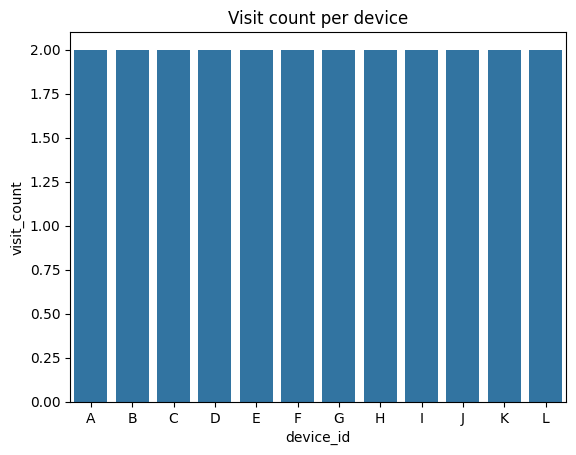

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='device_id', y='visit_count', data=features)
plt.title('Visit count per device');
plt.show()

In [4]:
# Train logistic regression
model, metrics = train(features[['visit_count', 'unique_pois']], (features['unique_pois'] > 1).astype(int))
metrics

{'accuracy': 0.75, 'precision': 0.75, 'recall': 1.0, 'roc_auc': 1.0}